
# Week 4 Dimensionality
Proprietary material - Under Creative Commons 4.0 licence CC-BY-NC https://creativecommons.org/licenses/by-nc/4.0/legalcode

# Scipy

Before we start, lets talk about Scipy.

Scipy its a Python library that comes with many tools designed for scientific use. They go from scientific functions, to processing tools, metrics, statistical tools, image processing, etc. 

Another library that you should keep in mind and we will cover in more detail next week is Scikit-learn. A library dedicated to offer most common machine learning algorithms and utility tools. 

I won't go over all it's functionality (that would take a wile and would be a bit redundant) but I will explain the relevant packages from Scipy as they become relevant. 

# Why We Care About Dimensionality

In machine learning and data science we often refer to dimensionality as the number of features in a dataset. This is easier to visualize in a structured dataset, where we organize the features by columns, but the concepts that we will cover today can also be applied to non-structured data like images or audio. 

Intuitively, one might think that having more features would be better. After all, each new feature it's providing the model with more information and context that in the worst case scenario should just be ignored. But in practice, this is contradicted from the actual results. This dissonance is known as the Curse of Dimensionality.

But first, let's go over some simple advantages of having a reduced amount od dimensions in our datasets.

1. Saves memory and computational costs. 

In applications with large amounts of data (Astronomy, Weather, Mining, etc.), having redundant features can increase the memory and computational costs by large margins. 

2. Helps in visualization.

Having too many dimensions can make difficult to focus or notice the relevant features in the data. It can also make the visualizations look bloated or hard to comprehend, so having a manageable amount of features can help you in designing the visualizations. 




## The Curse of Dimensionality

The Curse of Dimensionality it's a term that originate to describe the increase of volume in Euclidean spaces when you increase the number of dimensions. 

For Data Science, this concept takes slightly different details depending of the nature of the problem, but I'll try to go over the main points. 

First, machine learning models are first and foremost a statistical model. So increasing the amount of features also increases exponentially the amount of distributions that the model has to consider and makes finding relevant correlations harder. This extra dimensions also increase the amount of variance in the data and can introduce noise to the observations that makes the problem more difficult. 

Adding dimensions also increases the volume of the solution space that the algorithm has to search over. In computational terms, we have an increased number of We will touch this a bit more in the regression class, but consider how to describe the data correlations we needs more parameters for each added dimension. 

Another conflict that arises with more dimensions it's the increase in distance between each observation. For example, lets consider the following property of the Euclidean distance: 

$$
\sqrt{\sum_{i=1}^n (x_i - y_i)} \leq \sqrt{\sum_{i=1}^m (x_i - y_i)} 
$$

For any $n \leq m$

So for any dimension that we are adding to the dataset, we are increasing the distance between observations. This gets to the point where the Euclidean distance becomes useless. There are some other distance functions that work for high dimension spaces, but it still can make the problem harder to solve for many algorithms that require distance between observations. 

Now, we need a way to avoid the effects of the course on our models. A start would be a manual trimming of features from the dataset. Sometimes this process can be pretty straightforward and can be considered part of the data cleaning process. But it's more often the case that it's not that easy to identify which dimensions provide no information to our task. If we are not carefully we could remove some features that contain hidden correlations that could improve our model performance. 

This is where dimensionality reduction algorithms can help us reduce the dimensions of our dataset while keeping the most information possible.  

# Dimensionality Reduction Algorithms


There are two main ways to reduce dimensionality. The first one is to remove the least important features from the dataset in accordance to some defined metric. The second one requires a projection of the high dimension space to a lower one. 
This projection often provides a better performance to the models than the first method, but has the disadvantage that we loose the feature labels, so the interpretation of the results becomes harder. 

We don't have the time to go over all of them, so let's just list some common ones that you could use as reference. 

- Branch and bound search (BBS)
- Principal Component Analysis (PCA)
- Linear Discriminant Analysis (LDA)
- Kernel PCA
- t-distributed Stochastic Neighbor Embedding (t-SNE)
- Sequential Forward Selection (SFS)
- Autoencoders
- UMAP

There is no true best algorithm for dimensionality reduction. At best the algorithms give better results more consistently, but in practice you will need to make some test to verify which one works for your problem. 



# PCA

Principal Component Analysis, or PCA, is used to reduce the number of features in a large dataset to a smaller set of variables while preserving as much information as possible. There are currently some better algorithms that work in the same principle, but those require some understanding of bayesian models and information theory. 

PCA it's commonly used in several industries and has plenty of implementations in Python libraries. So it's still a good enough tool for most applications.




## What does it do? 

Let's begin showing the usefulness of the PCA algorithm with a toy example. Let's say we have some housing data:

<img src="pca_houses_1.png">
<img src="pca_houses_2.png">
<img src="pca_houses_3.png">

## Steps to apply PCA

Now let's go over the details on how to manually apply the PCA algorithm. This can be separated on the following steps:

1. Standardize the data
2. Computing Covariance matrix
3. Compute the Eigenvectors and Eigenvalues of
the Covariance matrix and identify Principal
Components
4. Project the data based on the principal
components

### Standarization 

The aim is to standardize the range of the continuous initial variables so that each of them contributes equally to the analysis. This it's necessary because the PCA algorithm it's very sensitive to variance in scale between variables. So for example, a variable with a range between 0 and 100 will dominate over another that has a range between 0 and 1. This way, the standardization prevents the addition of bias to the features. 

Mathematically, subtracting the mean and dividing by the standard deviation for each value for each variable does the trick.

$$
normalized\_value = \frac{value - feature\_mean}{feature\_standard\_deviation}
$$

In Python we can use the library Sklearn to easily scale our data:

In [1]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
print(scaler.mean_)
print(scaler.transform(data))
print(scaler.transform([[0.5, 0.1]]))

StandardScaler(copy=True, with_mean=True, with_std=True)
[0.5 0.5]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[ 0.  -0.8]]


StandardScaler() centres the data and usually does the job well but is prone to large outliers.
If there are large outliers, it's better to use RobustScaler(). 

Sklearn also provides the MinMaxScaler(), but it's not very good for PCA. 

### Covariance Matrix

The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them.

#### What is a covariance matrix?

- It is a PxP matrix where P is the number of
predictors/features/dimensions
- The elements along the diagonal are just the variances of each
feature.
- This is the matrix that we extract the top K eigenvectors and
eigenvalues out from which are known as our principal
components.

###  Compute Eigenvalues and Eigenvectors

- Take the covariance and compute all eigenvalues and eigenvectors
- With N initial features, there will N eigenvalue eigenvector pairs
- We arrange the eigenvalues in descending order and take the top K eigenvalues
- Since each eigenvalue is associated with an eigenvector,
the corresponding eigenvectors become our top K principal components
- Remember K < N(total number of features).

#### Transform the data using the K principal components

- Now, we have K principal components
- We use these K Principal Components to transform/project the data onto a new space which is defined by K features
- As mentioned before, K < N (where N is the total number of features) and since our new data is defined by K features now as opposed to N features, we see the dimensions are reduced!
- This is new data with fewer features is the data we plug into a Machine Learning model.

# Using dimensionality reduction on Toy Datasets.

In this section we'll take a look at a dataset we haven't seen before: The IRIS dataset. This is a labelled dataset that has 4 features for each datapoint. It stores the sepal length in cm for a flower, the sepal width in cm, the petal length in cm, and the petal width in cm. It also has a label telling us which flower this data point is for. There are 3 possible classes (i.e. types of flowers) represented in this data set: Iris Setosa, Iris Versiclolour, and Iris Virgnica. There are 150 samples (datapoints) in this dataset. First, we'll import the dataset.

In [2]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

# Take a look at the first few datapoints to get a sense of what it looks like:
print(df.head())

   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Next, you'll recall that in order to perform Principal Component Analysis (PCA), we need to apply standardization first. Standardization will ensure that each feature has a mean of 0 and a variance of 1. We can use a sklearn class to do this:

In [3]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# StandardScaler().fit_transform returns numpy arrays, not pandas dataframes

print(x[0:10]) # printing the first 10 rows of the standardized features 

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]]


Now that we've standardized our data, we can apply PCA to reduce the dimension. Since our data is currently 4 dimensional (since each input has 4 features), we can reduce our data down to either 3, 2, or 1 dimensions. We'll take a look at 3 and 2.

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])



# We are now adding the labels into the data matrix so that we have one 
# dataframe with all our information for graphing. 
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

/home/jose/anaconda3/envs/yolor37/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jose/anaconda3/envs/yolor37/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np

Notice that we've set the columns to be 'principal component 1' and 'principal component 2'. This is a very arbitrary choice of naming, and for good reason: Once we've reduced the dimensionality, we lose the inhereint meaning of the original feature names (petal length, petal width, etc). So now that we've reduced our data to have 2 features, we don't really know *exactly* what these two features represent.

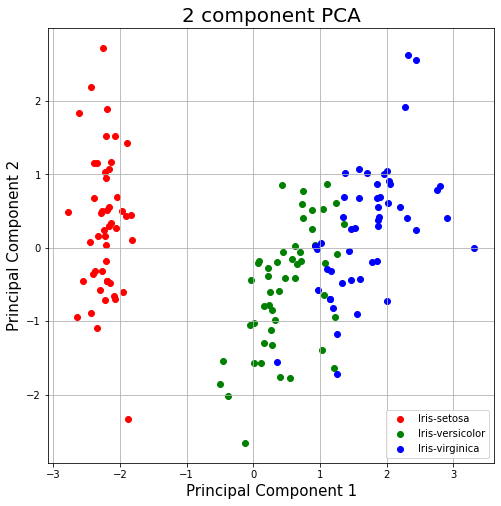

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b'] # 3 colors for the 3 types of Iris

for target, color in zip(targets,colors):
    # indicesToKeep generates a matrix of True and False values, where True
    # indicates the data point is of class target (see line 10), and False
    # indicates it is not.
    indicesToKeep = finalDf['target'] == target

    # Generate a scatter plot
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
    
ax.legend(targets)
ax.grid()

As you can see, our Principal Components got a lot of important information! We can see that even though we started with 4 dimensional data, we reduced it down to 2 and there is still clear distinction between the different classes (less so with green and blue, but still they are somewhat separated).

Now we'll take a look at doing the same thing, but instead of getting 2 Principal Components, we'll do 3.

In [6]:
pca = PCA(n_components=3)

principalComponents_3D = pca.fit_transform(x)

principalDf_3D = pd.DataFrame(data = principalComponents_3D
             , columns = ['principal component 1', 'principal component 2', 
                          'principal component 3'])



# We are now adding the labels into the data matrix so that we have one 
# dataframe with all our information for graphing. 
finalDf_3D = pd.concat([principalDf_3D, df[['target']]], axis = 1)

Now to plot:

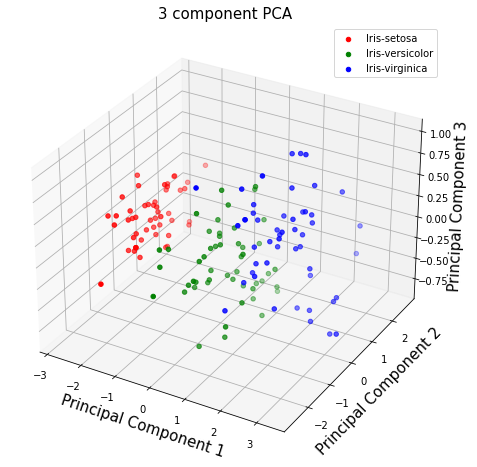

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 15)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b'] # 3 colors for the 3 types of Iris

for target, color in zip(targets,colors):
    # indicesToKeep generates a matrix of True and False values, where True
    # indicates the data point is of class target (see line 10), and False
    # indicates it is not.
    indicesToKeep = finalDf['target'] == target

    # Generate a scatter plot
    ax.scatter(finalDf_3D.loc[indicesToKeep, 'principal component 1']
               , finalDf_3D.loc[indicesToKeep, 'principal component 2']
               , finalDf_3D.loc[indicesToKeep, 'principal component 3']
               , c = color)
    
ax.legend(targets)
ax.grid()

Here it looks a bit messier. Judging strictly on our visual understanding of each graph we've seen, we'd likely try 2 principal components when working with a model, since it looks like the different classes are separated more clearly. But trying 3 certainly wouldn't hurt, as there's potential that the performance could be better.

# References

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

https://archive.ics.uci.edu/ml/datasets/iris

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html

https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

